# Import all the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import dtale
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from matplotlib.image import imread
from numpy import asarray
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.python.ops.math_ops import arg_max
import matplotlib.pyplot as plt
import random
import os

# Defining the Image and Batch size.

In [2]:
Image_Width = 224
Image_Height = 224
Image_Size = (Image_Width,Image_Height)
Image_Channels = 3
batch_size = 32

# Read images and convert into a data frame.

In [3]:
filenames=os.listdir("train")
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [44]:
df

,filename,category
0,cat.11967.jpg,cat
1,dog.9761.jpg,dog
2,dog.2398.jpg,dog
3,dog.9612.jpg,dog
4,dog.6992.jpg,dog
...,...,...
24995,dog.7390.jpg,dog
24996,dog.155.jpg,dog
24997,dog.4236.jpg,dog
24998,cat.12092.jpg,cat


In [5]:
df["category"] = df["category"].replace({0:'cat',1:'dog'})

In [6]:
df

,filename,category
0,cat.11967.jpg,cat
1,dog.9761.jpg,dog
2,dog.2398.jpg,dog
3,dog.9612.jpg,dog
4,dog.6992.jpg,dog
...,...,...
24995,dog.7390.jpg,dog
24996,dog.155.jpg,dog
24997,dog.4236.jpg,dog
24998,cat.12092.jpg,cat


# Divide the datasets into train_df, test_df, validate_df

In [13]:
train_df = df.loc[:22000]

In [14]:
train_df.shape

(22001, 2)

<AxesSubplot:xlabel='category', ylabel='count'>

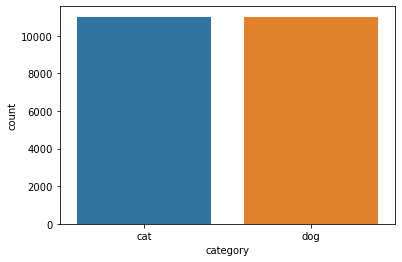

In [15]:
sns.countplot(x ='category', data = train_df)

In [16]:
train_df

,filename,category
0,cat.11967.jpg,cat
1,dog.9761.jpg,dog
2,dog.2398.jpg,dog
3,dog.9612.jpg,dog
4,dog.6992.jpg,dog
...,...,...
21996,dog.1014.jpg,dog
21997,dog.9490.jpg,dog
21998,dog.3532.jpg,dog
21999,cat.632.jpg,cat


In [ ]:
plt.figure(figsize=(20,20))
for i in range(2):
  plt.subplots(1)
  filename = '/data/NurulWorkspace/dogs-vs-cats/train/'+train_df['filename'][i]
  image = imread(filename)
  print('image shape', image .shape, 'maximum color level', image .max())
  # plot raw pixel data
  plt.imshow(image)

In [58]:
test_df = df.loc[22001:24000]

In [18]:
test_df.shape

(2000, 2)

In [19]:
test_df

,filename,category
22001,dog.8675.jpg,dog
22002,cat.4647.jpg,cat
22003,dog.8104.jpg,dog
22004,cat.2333.jpg,cat
22005,dog.567.jpg,dog
...,...,...
23996,cat.678.jpg,cat
23997,cat.11408.jpg,cat
23998,dog.3668.jpg,dog
23999,dog.10921.jpg,dog


<AxesSubplot:xlabel='category', ylabel='count'>

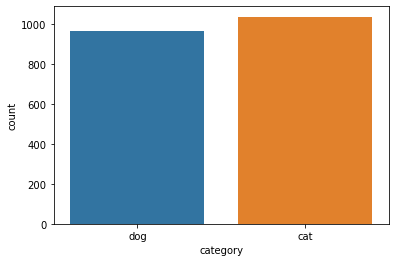

In [20]:
sns.countplot(x ='category', data = test_df)

In [21]:
validate_df = df.loc[24001:24999]

In [45]:
validate_df.shape

(999, 2)

# Create data generators for the training and validation data

In [23]:
# Create data generators for the training and validation data
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "train/",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "train/", 
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)

Found 22001 validated image filenames belonging to 2 classes.
Found 999 validated image filenames belonging to 2 classes.


# Creating a Basic CNN architecture 

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(Image_Width, Image_Height, Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Print the model summary
model.summary()

2023-02-21 21:16:27.803139: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-21 21:16:27.826281: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-21 21:16:27.826433: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 64)     2

2023-02-21 21:16:27.827514: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-21 21:16:27.828359: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-21 21:16:27.828467: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-21 21:16:27.828546: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [10]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.0001)
callbacks = [earlystop,learning_rate_reduction]

# Training the model

In [24]:
epochs= 90
history = model.fit(
    train_generator, 
    epochs = epochs,
    validation_data=validation_generator,
    #callbacks=callbacks
)

Epoch 1/90


2023-02-21 21:16:30.120271: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8600
2023-02-21 21:16:30.741707: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


688/688 [==============================] - 117s 167ms/step - loss: 0.7381 - accuracy: 0.6408 - val_loss: 0.5902 - val_accuracy: 0.6957
Epoch 2/90
688/688 [==============================] - 114s 165ms/step - loss: 0.5168 - accuracy: 0.7449 - val_loss: 0.4764 - val_accuracy: 0.7658
Epoch 3/90
688/688 [==============================] - 113s 164ms/step - loss: 0.4542 - accuracy: 0.7889 - val_loss: 0.4531 - val_accuracy: 0.7908
Epoch 4/90
688/688 [==============================] - 113s 165ms/step - loss: 0.4248 - accuracy: 0.8052 - val_loss: 0.4564 - val_accuracy: 0.7978
Epoch 5/90
688/688 [==============================] - 114s 165ms/step - loss: 0.3924 - accuracy: 0.8259 - val_loss: 0.4419 - val_accuracy: 0.8028
Epoch 6/90
688/688 [==============================] - 114s 166ms/step - loss: 0.3712 - accuracy: 0.8386 - val_loss: 0.4382 - val_accuracy: 0.8178
Epoch 7/90
688/688 [==============================] - 115s 168ms/step - loss: 0.3477 - accuracy: 0.8522 - val_loss: 0.3341 - val_accura

In [46]:
model.save("Data_Cats_vs_Dogs_Classification_25K_Images.h5")

# Plotting the accuracy and loss curve for the training phase per each epoch.

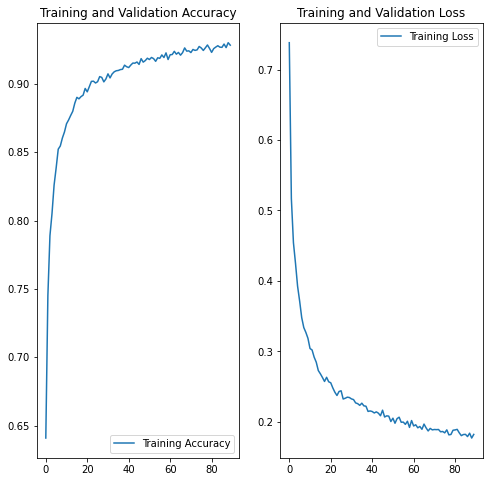

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Create data generators for the test data

In [28]:

test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

test_generator = train_datagen.flow_from_dataframe(test_df,
                                            "train/", x_col= 'filename', y_col='category',
                                            target_size=Image_Size,
                                            class_mode= 'categorical',
                                            shuffle = False,
                                            batch_size=batch_size
                                            )

Found 2000 validated image filenames belonging to 2 classes.


In [30]:
test_df['category']

22001    dog
22002    cat
22003    dog
22004    cat
22005    dog
        ... 
23996    cat
23997    cat
23998    dog
23999    dog
24000    cat
Name: category, Length: 2000, dtype: object

In [ ]:
sns.countplot(x ='category', data = test_df)

In [31]:
from sklearn.metrics import confusion_matrix
# Generate predictions for the test data
predictions = model.predict(test_generator)

# Convert the predictions from one-hot encoding to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes of the test data
true_classes = test_generator.classes

# Calculate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print(cm)

[[990  46]
 [106 858]]


In [32]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, predicted_classes))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1036
           1       0.95      0.89      0.92       964

    accuracy                           0.92      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.92      0.92      2000



In [59]:
loss, accuracy = model.evaluate(test_generator)

# Print the overall accuracy
print("Accuracy:", accuracy)

32/32 [==============================] - 5s 147ms/step - loss: 0.6125 - accuracy: 0.7060
Accuracy: 0.7059999704360962
